In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [6]:

# Build CNN Model
model = Sequential()

# Convolutional Layers
model.add(Conv2D(32, (3, 3), activation='relu', padding='same',
                 input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Flatten + Dense Layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(10, activation='softmax'))



In [7]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=64
)


Epoch 1/15
782/782 [==============================] - 11s 10ms/step - loss: 2.0396 - accuracy: 0.3490
Epoch 2/15
782/782 [==============================] - 7s 9ms/step - loss: 1.3413 - accuracy: 0.5224
Epoch 3/15
782/782 [==============================] - 7s 9ms/step - loss: 1.1530 - accuracy: 0.5919
Epoch 4/15
782/782 [==============================] - 7s 9ms/step - loss: 1.0539 - accuracy: 0.6316
Epoch 5/15
782/782 [==============================] - 7s 9ms/step - loss: 0.9873 - accuracy: 0.6542
Epoch 6/15
782/782 [==============================] - 7s 10ms/step - loss: 0.9278 - accuracy: 0.6761 0s - loss: 0.9270 
Epoch 7/15
782/782 [==============================] - 8s 10ms/step - loss: 0.8881 - accuracy: 0.6908
Epoch 8/15
782/782 [==============================] - 7s 9ms/step - loss: 0.8548 - accuracy: 0.6999
Epoch 9/15
782/782 [==============================] - 7s 9ms/step - loss: 0.8197 - accuracy: 0.7129
Epoch 10/15
782/782 [==============================] - 7s 9ms/step - loss: 0.

In [9]:


test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)


Test Accuracy: 0.7547000050544739


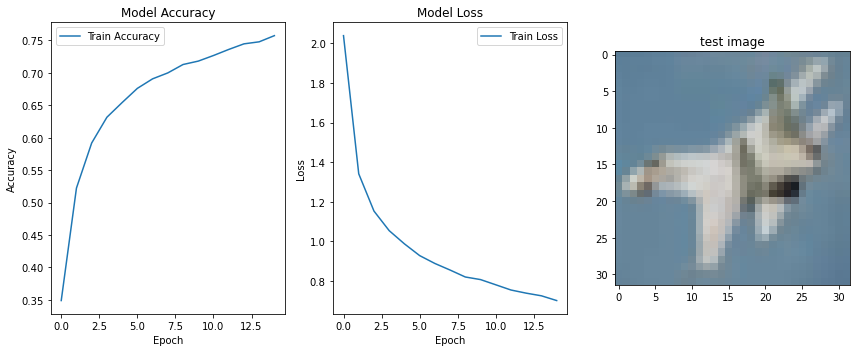

In [15]:


plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 3, 3)
plt.imshow(X_test[10], label='test image')
plt.title("test image")
plt.xlabel("")
plt.ylabel("")
plt.tight_layout()
plt.show()


In [22]:
class_names = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

In [23]:
sample_image = X_test[10]
sample_label = np.argmax(y_test[10])

In [24]:
import numpy as np

sample_input = sample_image.reshape(1, 32, 32, 3)

# Predict
prediction = model.predict(sample_input)
predicted_class = np.argmax(prediction)

print("Predicted label:", class_names[predicted_class])

Predicted label: airplane


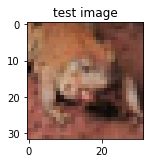

In [25]:
plt.subplot(1, 3, 3)
plt.imshow(X_test[5], label='test image')
plt.title("test image")
plt.xlabel("")
plt.ylabel("")
plt.tight_layout()
plt.show()


In [26]:
sample_image = X_test[5]
sample_label = np.argmax(y_test[5])
import numpy as np

sample_input = sample_image.reshape(1, 32, 32, 3)

# Predict
prediction = model.predict(sample_input)
predicted_class = np.argmax(prediction)

print("Predicted label:", class_names[predicted_class])

Predicted label: frog
